In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [10]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [12]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [13]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    #if i % (iterations / 10) == 0:
      #print(i, W, err)
    return [lambda_, W[0], W[1], W[2], W[3], err]

In [14]:
print(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4))

[0.0001, 57.39713014349266, 6.121025153175968, 1.4301203034518335, 4.115874512202114, 39.77775476050768]


In [15]:
my_lambda = []
lb = 1e-4
for i in range(500):
    my_lambda.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lb))
    lb +=0.005

In [16]:
Lamd = pd.DataFrame(my_lambda,columns=['Lambda', 'W0', 'W1', 'W2', 'W3', 'err'])

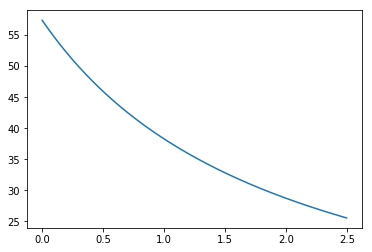

In [17]:
plt.plot(Lamd['Lambda'], Lamd['W0'])

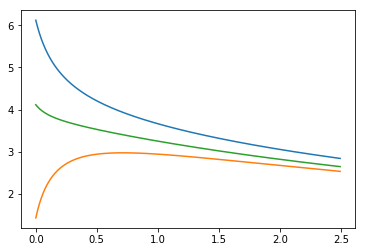

In [18]:
plt.plot(Lamd['Lambda'], Lamd['W1'])
plt.plot(Lamd['Lambda'], Lamd['W2'])
plt.plot(Lamd['Lambda'], Lamd['W3'])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Формулы, конечно, от этого не сомаются, но и смысла особого в этом нет.